In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('events.csv',low_memory=False)

In [3]:
visited = df.loc[df.event == 'visited site'].loc[df['new_vs_returning']=='New']

In [4]:
viewed = df.loc[df.event == 'viewed product']

In [5]:
checkouts = df.loc[df.event == 'checkout']

In [6]:
conversions = df.loc[df.event == 'conversion']

In [7]:
funnel = visited['person'].to_frame()

In [8]:
funnel = funnel.set_index('person')

##### Seteo nuevas columnas con la cantidad de ocurrencias de la persona en 'viewed product', 'checkouts' y 'conversions'

In [9]:
funnel['vistas'] = viewed['person'].value_counts()

In [10]:
funnel['checkouts'] = checkouts['person'].value_counts()

In [11]:
funnel['conversions'] = conversions['person'].value_counts()

In [12]:
#relleno los "NaN" con cero porque indica que no hubo ocurrencias de esa persona en la lista
#por lo tanto debe ir cero
funnel = funnel.fillna(0)
funnel

,vistas,checkouts,conversions
person,,,
0004b0a2,1.0,1,0.0
0006a21a,1.0,1,0.0
000a54b2,19.0,1,0.0
00184bf9,36.0,4,0.0
0019c395,2.0,1,0.0
001bb7eb,2.0,1,0.0
001f1653,1.0,1,0.0
00204059,44.0,5,1.0
0024a82b,4.0,1,0.0


In [13]:
funnel['dif1'] = funnel['vistas']-funnel['checkouts'] #diferencia entre vistas y checkouts

In [14]:
funnel['dif2'] = funnel['vistas']-funnel['conversions'] #diferencia entre vistas y conversiones

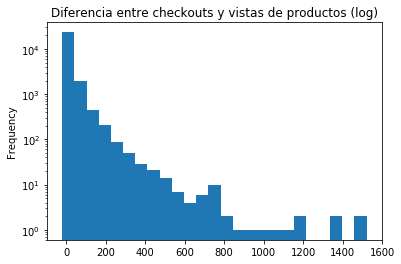

In [15]:
plt.yscale('log')
plt.title('Diferencia entre checkouts y vistas de productos (log)')
funnel.loc[funnel['vistas']>0]['dif1'].plot.hist(bins=25)

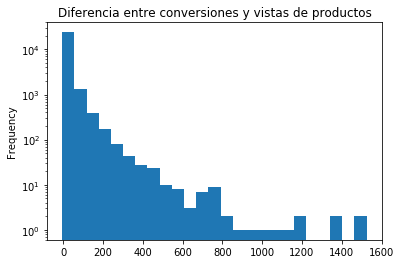

In [16]:
plt.yscale('log')
plt.title('Diferencia entre conversiones y vistas de productos')
funnel.loc[funnel['vistas']>0]['dif2'].plot.hist(bins=25)

#### Las personas con '0' indican que visitaron un unico producto y lo compraron

# Relacion entre vistas y compras de productos por persona

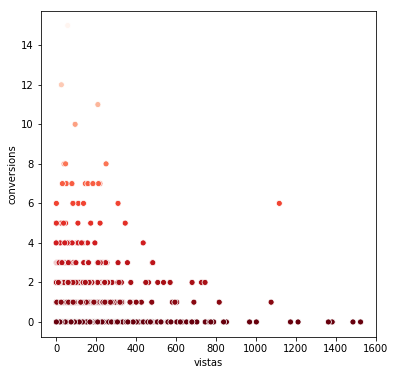

In [17]:
fig,ax=plt.subplots(figsize=(6,6))
sns.scatterplot(ax=ax,data=funnel,x='vistas',y='conversions',hue='conversions',\
                legend=False,palette='Reds_r')
